In [36]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [38]:
path = os.getcwd()
model = "llama3"
size = "8B"
data_path = path + f"/{model}"
save = path + f"/plot/{model}"
if not os.path.exists(save):
    os.mkdir(save)

task = "all_mean"
task_name = task.replace("_", " ")

data_char_diff = np.load(f'{data_path}/{task}_{size}.npy')  
data_none_char_diff =  np.load(f'{data_path}/none_{task}_{size}.npy')  

num_samples = data_char_diff.shape[0]  
num_time = data_char_diff.shape[1]
num_layers = data_char_diff.shape[2]  
hidden_size = data_char_diff.shape[3]  

print('char shape:', data_char_diff.shape)
print('none char shape:', data_none_char_diff.shape)
print(f"Data loaded successfully. Plots will be saved in: {save}")

char_differences = data_char_diff - data_none_char_diff
print('differences shape:', char_differences.shape)

char shape: (1, 1, 33, 4096)
none char shape: (1, 1, 33, 4096)
Data loaded successfully. Plots will be saved in: /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3
differences shape: (1, 1, 33, 4096)


plot the top 20 neurons
Top indices matrix (per layer):
[[1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369
  1370 1371 1372 1373 4094 4095]
 [3266 3620 1605 1581 1370 4083 3860 3869 2943 2932 1519 3909   42 4055
  2692 3516 2265 3231  912  291]
 [2082 3522 2116 2960 2875 2261 1694 2057 3869 2977 3620 3396 2646 2932
  3231  873 2260 2265  912 3516]
 [1869 1985 1063 3405 2960 2261 2977  873 2943 1656  607   42 4055 3096
  2932 2717  431 3632 2265 3516]
 [ 452 2578 1869 1581  746 2885 3244 3405 2250  431 1330 2246 2977 3096
  3632 2265   42  281 2932 3516]
 [ 788 2206 2636 3595 2993 1022 2932 2082 2311 2303 2389 3939 3516 3096
  2183 3476 3823  431  766 2977]
 [2934  133  431 2311 3516 3610 4092 3371  125 3034  788 3824  151 3298
  1162 1421 3595 2082 2932 2977]
 [3037  210 3828 2434 2303 1441 2088 4062 3070 1110  114  341  998  187
   230 3075 2775  291 2932 4055]
 [2289 3403 1888 3495 1648 4068  210  696 1276 1105  144 3777  690 3918
    48 3388 4034 2115 2375 3274]

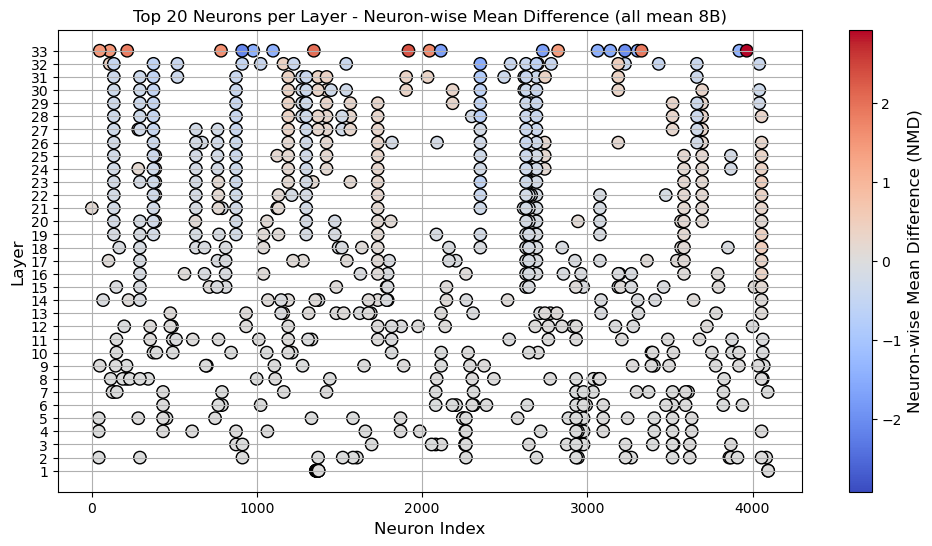

In [40]:
# Step 1: Compute mean NMD for each neuron across samples
mean_diff = char_differences.mean(axis=0).squeeze()  # Shape: (layers, neurons)
# top = 15  # Number of top neurons
top = hidden_size//200
print(f"plot the top {top} neurons")

# Step 2: Identify Top neurons for each layer
top_neurons_per_layer = []
top_indices_matrix = np.zeros((mean_diff.shape[0], top), dtype=int)  # Initialize matrix to store top indices
top_values_matrix = np.zeros((mean_diff.shape[0], top))  # Initialize matrix to store top NMD values

for layer_idx in range(mean_diff.shape[0]):  # Iterate over layers
    layer_values = mean_diff[layer_idx]  # NMD values for the current layer
    top_indices = np.argsort(np.abs(layer_values))[-top:]  # Indices of top neurons (by absolute value)
    top_indices_matrix[layer_idx] = top_indices  # Store indices in matrix
    top_values_matrix[layer_idx] = layer_values[top_indices]  # Store values in matrix
    top_neurons_per_layer.append((layer_idx, top_indices))  # Store layer index and neuron indices

# Print top indices and values for debugging
print("Top indices matrix (per layer):")
print(top_indices_matrix)
# print("\nTop values matrix (per layer):")
# print(top_values_matrix)

# Step 3: Combine results into a scatter plot
layer_positions = []
neuron_indices = []
top_values = []

for layer_idx, top_indices in top_neurons_per_layer:
    layer_positions.extend([layer_idx + 1] * len(top_indices))  # Convert layer index to 1-based for plotting
    neuron_indices.extend(top_indices)  # Add neuron indices
    top_values.extend(mean_diff[layer_idx, top_indices])  # Add corresponding NMD values

# Calculate symmetric color limits
abs_max = max(abs(np.min(top_values)), abs(np.max(top_values)))

# Step 4: Plot scatter plot for Top neurons
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(
    neuron_indices, layer_positions, c=top_values, cmap='coolwarm', edgecolor='k', s=80, vmin=-abs_max, vmax=abs_max
)

# Customize the plot
ax.set_title(f"Top {top} Neurons per Layer - Neuron-wise Mean Difference ({task_name} {size})", fontsize=12)
ax.set_xlabel("Neuron Index", fontsize=12)
ax.set_ylabel("Layer", fontsize=12)
ax.set_yticks(np.arange(1, mean_diff.shape[0] + 1))  # Layers on Y-axis
ax.grid(True)

# Add colorbar to represent NMD values
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label("Neuron-wise Mean Difference (NMD)", fontsize=12)

# Save the plot
save_path = f"{save}/top_{top}_neuron_positions_{task}_{size}.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Image saved to {save_path}")
plt.show()

Image saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/sorted_neuron_mean_difference_all_mean_8B.png


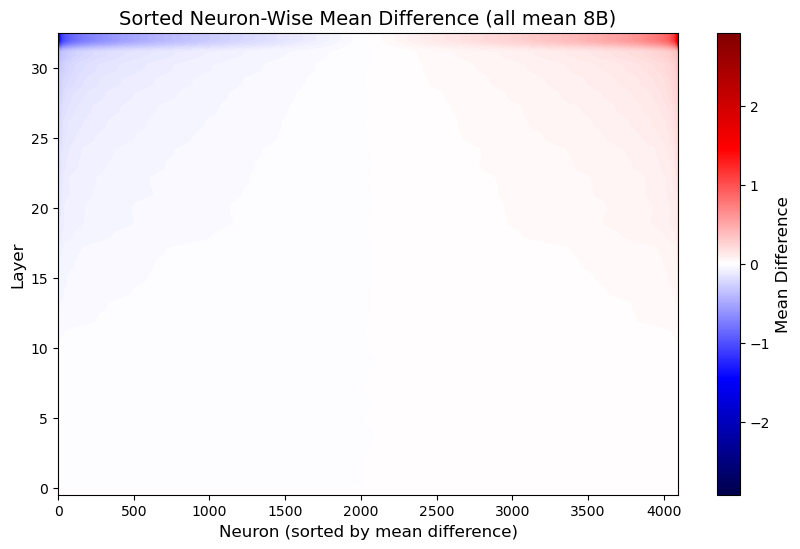

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Example: char_differences of shape (samples, 1, layers, neurons)
# Assuming char_differences is already loaded

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences
# normalized_char = normalize_layer_v2(data_char)  # Shape: (103, 6, 17, 2048)
# normalized_none_char = normalize_layer_v2(data_none_char)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char, threshold=0.2)


# Step 1: Compute mean across samples for each layer
mean_diff = char_differences.mean(axis=0).squeeze()  # Shape: (layers, neurons)
# mean_diff = normalize_layer_v2(char_differences).mean(axis=0).squeeze() 

# Step 2: Sort neurons in each layer by mean difference
sorted_diff = np.sort(mean_diff, axis=1)  # Sort each row (layer) by neuron values

# Step 3: Calculate symmetric color limits
abs_max = max(abs(np.min(sorted_diff)), abs(np.max(sorted_diff)))

# Step 4: Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(sorted_diff, aspect='auto', cmap='seismic', origin='lower', vmin=-abs_max, vmax=abs_max)

# Add labels and title
ax.set_title(f"Sorted Neuron-Wise Mean Difference ({task_name} {size})", fontsize=14)
ax.set_xlabel("Neuron (sorted by mean difference)", fontsize=12)
ax.set_ylabel("Layer", fontsize=12)

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean Difference", fontsize=12)

# Save the plot
save_path = f"{save}/sorted_neuron_mean_difference_{task}_{size}.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Image saved to {save_path}")
plt.show()

In [25]:
def normalize_layer_v1(data):
    normalized_data = np.empty_like(data)
    for layer_idx in range(data.shape[2]):  # Loop over layers (17 layers in total)
        layer_min = data[:, :, layer_idx, :].min()  # Min across positions and hidden dimensions
        layer_max = data[:, :, layer_idx, :].max()  # Max across positions and hidden dimensions
        max_abs = max(abs(layer_min), layer_max)  # Max absolute value for normalization
        normalized_data[:, :, layer_idx, :] = data[:, :, layer_idx, :] / max_abs  # Normalize
    return normalized_data

# Normalize each layer with separate scaling for positive and negative values
def normalize_layer_v2(data):
    normalized_data = np.empty_like(data)
    for layer_idx in range(data.shape[2]):  # Loop over layers (e.g., 17 layers in total)
        layer_min = data[:, :, layer_idx, :].min()  # Min across positions and hidden dimensions
        layer_max = data[:, :, layer_idx, :].max()  # Max across positions and hidden dimensions

        positive_scale = layer_max if layer_max > 0 else 1  # Avoid division by zero for positive values
        negative_scale = abs(layer_min) if layer_min < 0 else 1  # Avoid division by zero for negative values

        # Apply separate normalization for positive and negative values
        layer_data = data[:, :, layer_idx, :]
        normalized_layer = np.where(
            layer_data >= 0,
            layer_data / positive_scale,  # Scale positive values
            layer_data / negative_scale   # Scale negative values
        )
        normalized_data[:, :, layer_idx, :] = normalized_layer

    return normalized_data

# Normalize each layer with separate scaling for positive and negative values
def normalize_layer_with_th(data, threshold=0.2):
    """
    Normalize activations per layer, scaling positive and negative values separately,
    and set values with absolute magnitude below the threshold to 0.
    
    Args:
        data: Input tensor of shape (samples, positions, layers, neurons).
        threshold: Threshold below which activations are set to 0 (default=0.25).
        
    Returns:
        Normalized and thresholded data.
    """
    normalized_data = np.empty_like(data)
    for layer_idx in range(data.shape[2]):  # Loop over layers (e.g., 17 layers in total)
        layer_min = data[:, :, layer_idx, :].min()  # Minimum across positions and hidden dimensions
        layer_max = data[:, :, layer_idx, :].max()  # Maximum across positions and hidden dimensions

        positive_scale = layer_max if layer_max > 0 else 1  # Avoid division by zero
        negative_scale = abs(layer_min) if layer_min < 0 else 1  # Avoid division by zero

        # Apply separate normalization for positive and negative values
        layer_data = data[:, :, layer_idx, :]
        normalized_layer = np.where(
            layer_data >= 0,
            layer_data / positive_scale,  # Scale positive values
            layer_data / negative_scale   # Scale negative values
        )

        # Set all values with absolute magnitude below the threshold to 0
        binned_data = np.where(np.abs(normalized_layer) < threshold, 0, normalized_layer)
        
        normalized_data[:, :, layer_idx, :] = binned_data

    return normalized_data

char shape: (33,)
none char shape: (33,)
layers shape: (33,)
mean difference shape: (33,)
Image has been saved into /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/average_activations_with_mean_differences_all_mean_8B.png


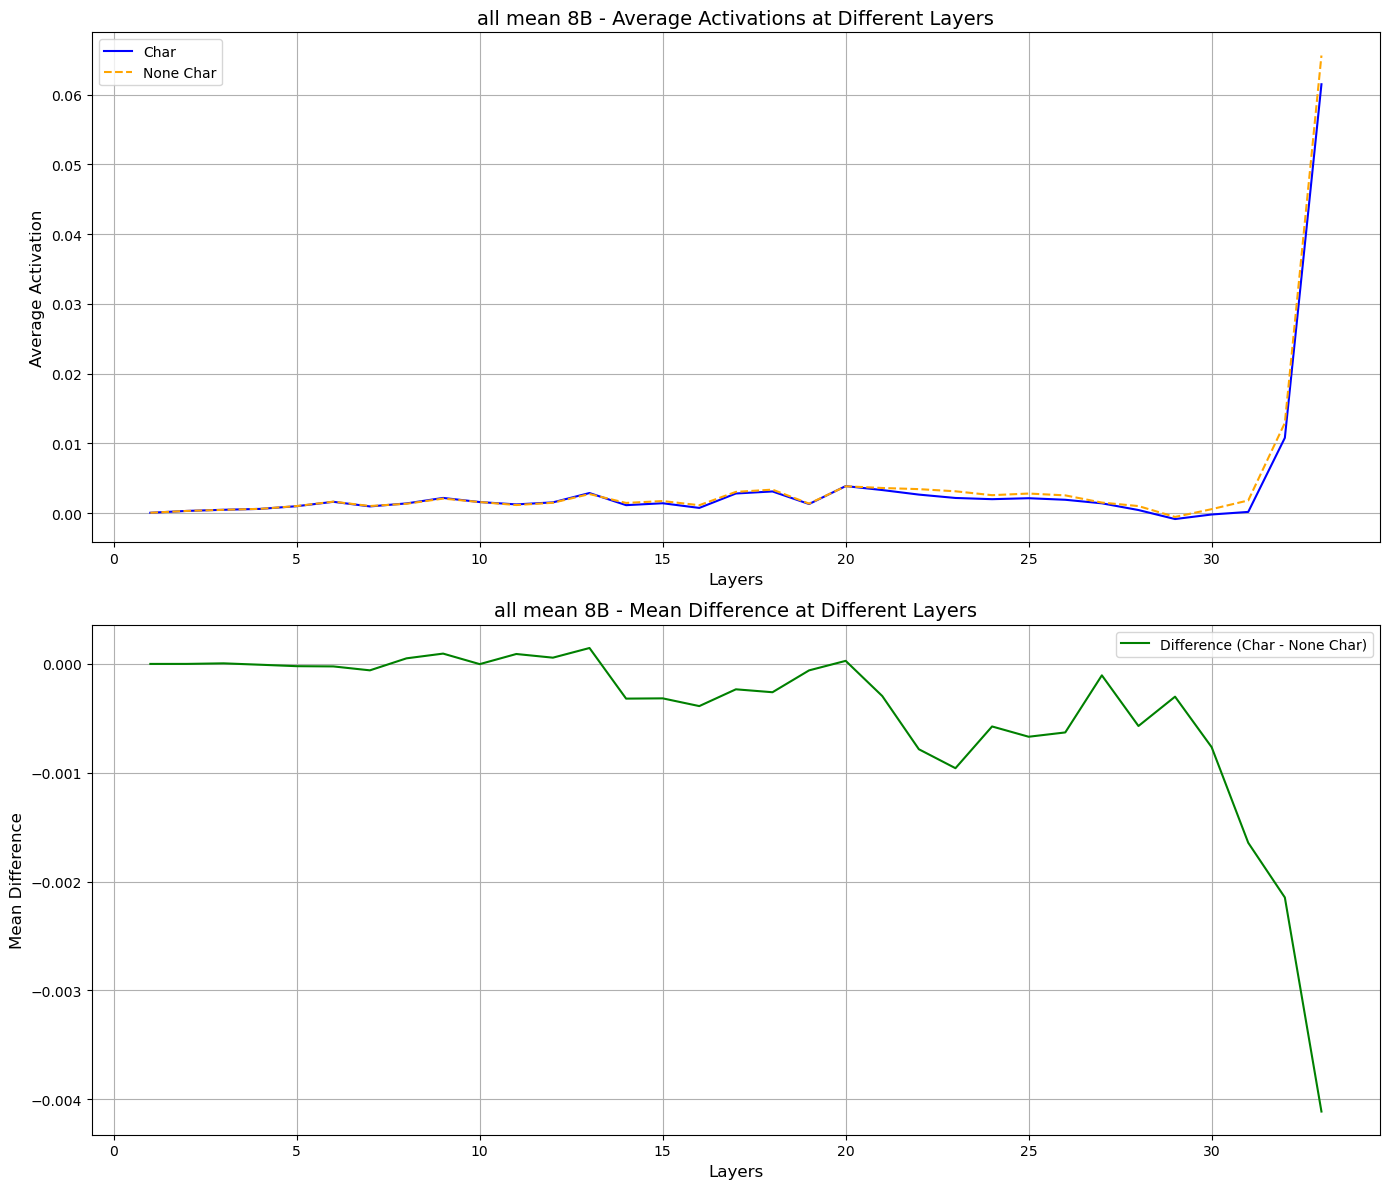

In [27]:
# Mean samples and mean layers

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences
# normalized_char = normalize_layer_v2(data_char)  # Shape: (103, 6, 17, 2048)
# normalized_none_char = normalize_layer_v2(data_none_char)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char, threshold=0.2)

# mean_char = data_char.mean(axis=(0, 3)).reshape(-1) 
# mean_none_char = data_none_char.mean(axis=(0, 3)).reshape(-1)  

mean_char = data_char_diff.mean(axis=(0, 3)).reshape(-1) 
mean_none_char = data_none_char_diff.mean(axis=(0, 3)).reshape(-1)  
print('char shape:', mean_char.shape) 
print('none char shape:', mean_none_char.shape) 

num_layers = mean_char.shape[0]  
layers = np.arange(1, num_layers + 1) 
print('layers shape:', layers.shape)  

# Compute mean difference across inconsistent samples
mean_difference = char_differences.mean(axis=(0, 3)).reshape(-1)    
print('mean difference shape:', mean_difference.shape) 

# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=False)

# Plot char and none char on the same subplot
ax = axes[0]
ax.plot(layers, mean_char, label='Char', color='blue')
ax.plot(layers, mean_none_char, label='None Char', color='orange', linestyle='dashed')
ax.set_title(f'{task_name} {size} - Average Activations at Different Layers', fontsize=14)
ax.set_ylabel('Average Activation', fontsize=12)
ax.set_xlabel('Layers', fontsize=12)
ax.legend()
ax.grid(True)

# Plot mean difference
ax = axes[1]
ax.plot(layers, mean_difference, label='Difference (Char - None Char)', color='green')
ax.set_title(f'{task_name} {size} - Mean Difference at Different Layers', fontsize=14)
ax.set_xlabel('Layers', fontsize=12)
ax.set_ylabel('Mean Difference', fontsize=12)
ax.legend()
ax.grid(True)

plt.tight_layout()

# Save figure
save_path = f"{save}/average_activations_with_mean_differences_{task}_{size}.png"
plt.savefig(save_path, dpi=300)
print(f"Image has been saved into {save_path}")

# Display plot
plt.show()

Image has been saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/max_min_combined_activations_all_mean_8B.png


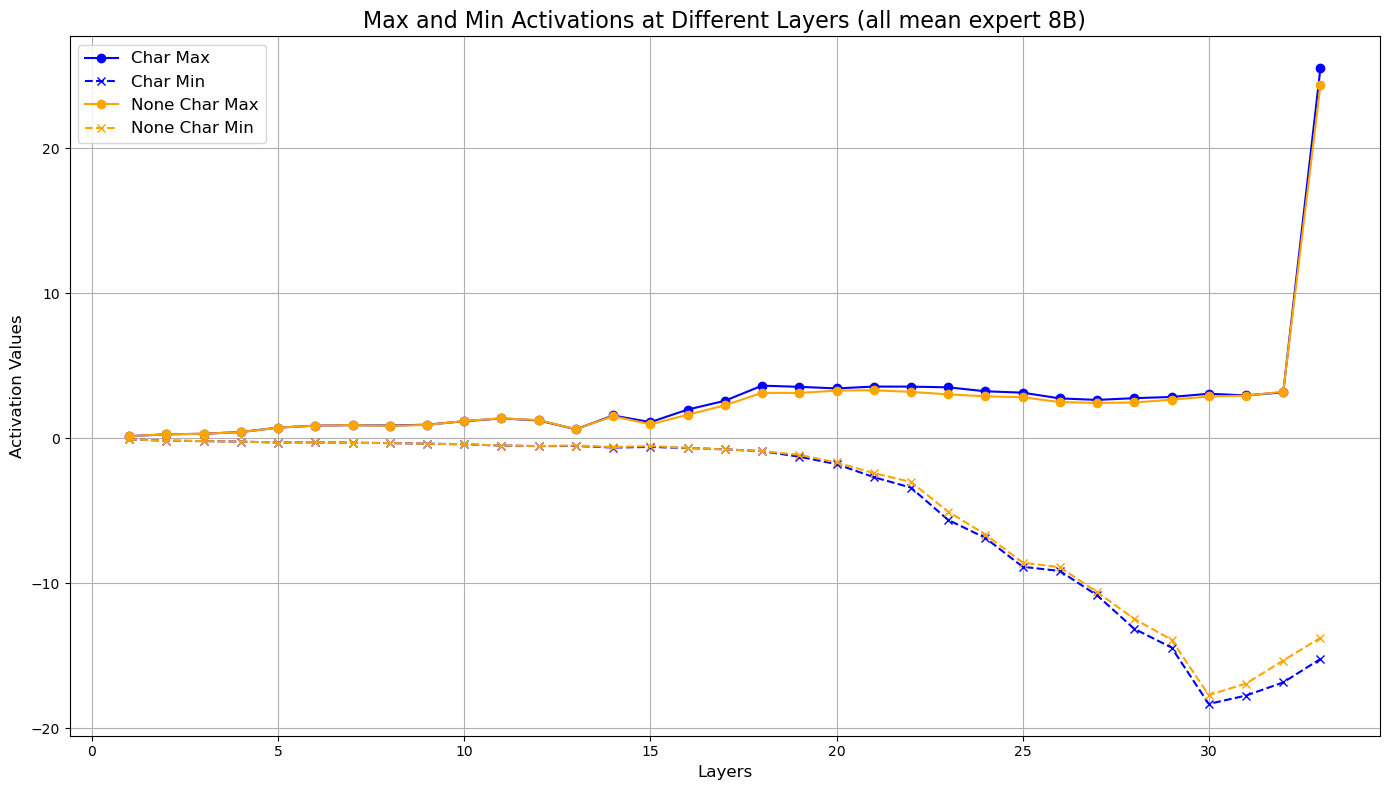

In [29]:
# Max and Min samples and layers

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences
# normalized_char = normalize_layer_v2(data_char)  # Shape: (103, 6, 17, 2048)
# normalized_none_char = normalize_layer_v2(data_none_char)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char, threshold=0.2)

start = 0
end = num_layers

# # Max and Min samples and layers
max_char = data_char_diff[:, :, start:end, :].max(axis=(0, 3))  # Shape: (1, 33)
min_char = data_char_diff[:, :, start:end, :].min(axis=(0, 3))  # Shape: (1, 33)
max_none_char = data_none_char_diff[:, :, start:end, :].max(axis=(0, 3))  # Shape: (1, 33)
min_none_char = data_none_char_diff[:, :, start:end, :].min(axis=(0, 3))  # Shape: (1, 33)

# max_char = data_char[:, :, start:end, :].max(axis=(0, 3))  # Shape: (1, 33)
# min_char = data_char[:, :, start:end, :].min(axis=(0, 3))  # Shape: (1, 33)
# max_none_char = data_none_char[:, :, start:end, :].max(axis=(0, 3))  # Shape: (1, 33)
# min_none_char = data_none_char[:, :, start:end, :].min(axis=(0, 3))  # Shape: (1, 33)

layers = np.arange(start + 1, end + 1)  # Adjusted to reflect the selected range of layers

# Create a single figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot char max and min
ax.plot(layers, max_char.squeeze(), label='Char Max', color='blue', linestyle='-', marker='o')
ax.plot(layers, min_char.squeeze(), label='Char Min', color='blue', linestyle='--', marker='x')

# Plot none-char max and min
ax.plot(layers, max_none_char.squeeze(), label='None Char Max', color='orange', linestyle='-', marker='o')
ax.plot(layers, min_none_char.squeeze(), label='None Char Min', color='orange', linestyle='--', marker='x')

# Customize the plot
ax.set_title(f'Max and Min Activations at Different Layers ({task_name} expert {size})', fontsize=16)
ax.set_xlabel('Layers', fontsize=12)
ax.set_ylabel('Activation Values', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)

plt.tight_layout()

# Save the plot
save_path = f"{save}/max_min_combined_activations_{task}_{size}.png"
plt.savefig(save_path, dpi=300)
print(f"Image has been saved to {save_path}")

# Show the plot
plt.show()

Char Expert Activation Distribution:
Image has been saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/all_mean_3B_distribution_colormap.png


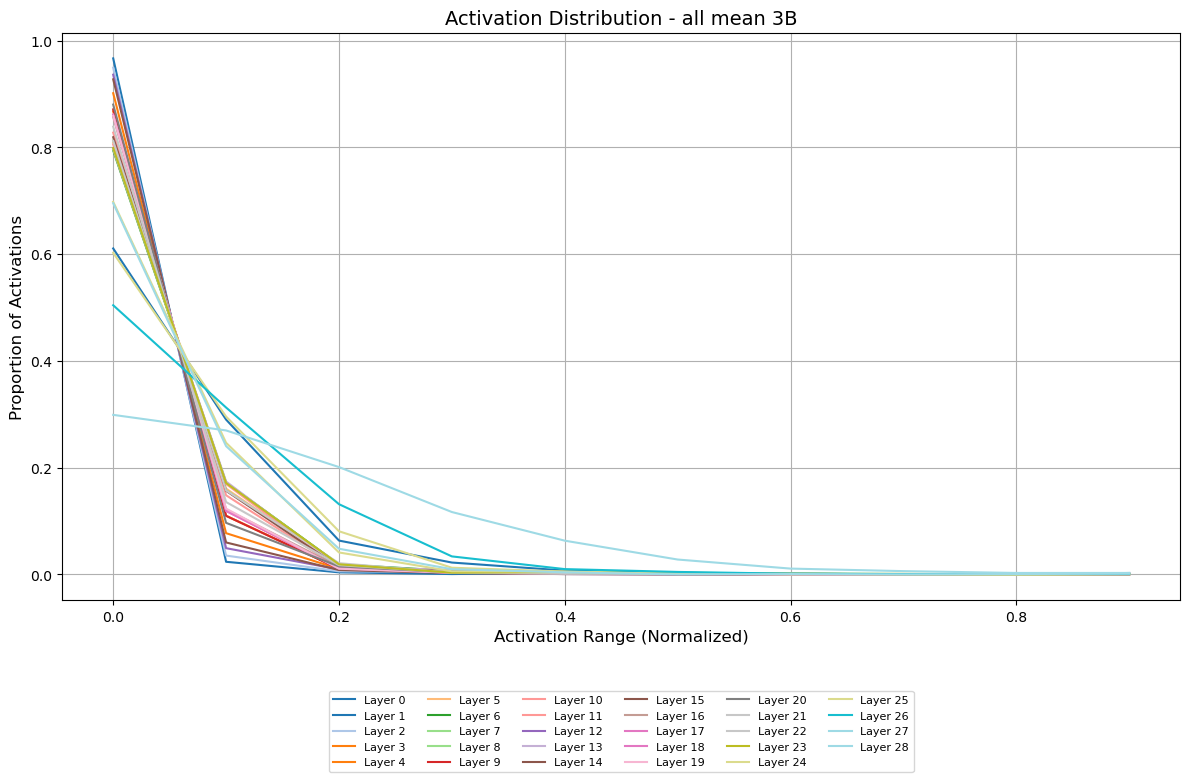

None Char Expert Activation Distribution:
Image has been saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/none_all_mean_3B_distribution_colormap.png


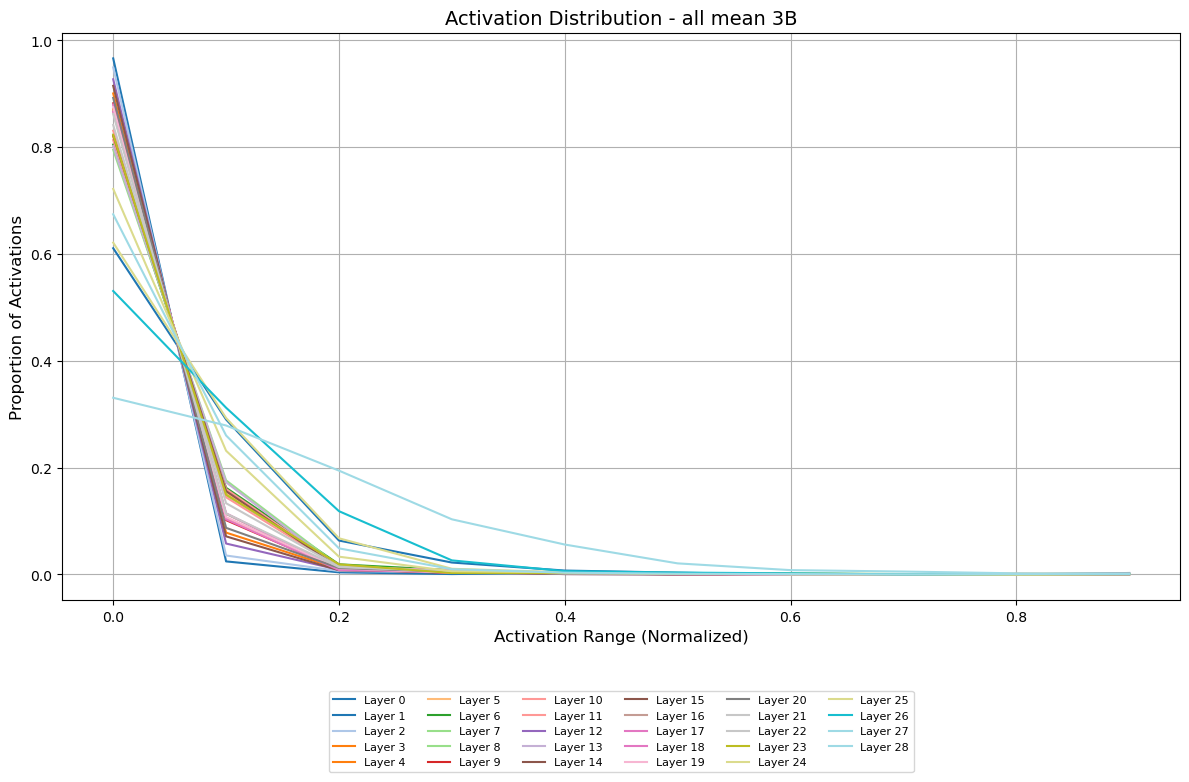

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences

normalized_char = normalize_layer_v2(data_char_diff)  # Shape: (103, 6, 17, 2048)
normalized_none_char = normalize_layer_v2(data_none_char_diff)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char_diff, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char_diff, threshold=0.2)

# Calculate the proportion of activations
def calculate_activation_distribution(data, bins=np.arange(0.0, 1.1, 0.1)):
    layer_distribution = {}
    for layer_idx in range(data.shape[2]): 
        layer_data = data[:, :, layer_idx, :]
        layer_data_flat = layer_data[layer_data >= 0].flatten()  

        # Calculate the proportion within each interval
        hist, _ = np.histogram(layer_data_flat, bins=bins)
        hist = hist / layer_data_flat.size  
        layer_distribution[layer_idx] = hist

    return layer_distribution

# Plot the activation distribution
def plot_distribution(distribution, bins, save_path=None):
    layers = list(distribution.keys())
    colormap = plt.colormaps['tab20'].resampled(len(layers))  # Compatible colormap
    
    # Plot the graph
    fig, ax = plt.subplots(figsize=(12, 8))
    for i, layer in enumerate(layers):
        plt.plot(bins[:-1], distribution[layer], 
                 label=f'Layer {layer}', 
                 color=colormap(i))
    
    plt.title(f'Activation Distribution - {task_name} {size}', fontsize=14)
    plt.xlabel('Activation Range (Normalized)', fontsize=12)
    plt.ylabel('Proportion of Activations', fontsize=12)
    plt.grid()

    # Adjust legend
    plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)  # 图例放在图下方
    plt.tight_layout()

    # Save or display the image
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Ensure entire plot fits in saved image
        print(f"Image has been saved to {save_path}")
    plt.show()

# Main workflow
bins = np.arange(0.0, 1.1, 0.1)  # Define activation intervals
# Assume normalized_management and normalized_medical are pre-normalized data
char_distribution = calculate_activation_distribution(normalized_char, bins)
none_char_distribution = calculate_activation_distribution(normalized_none_char, bins)

# Plot and save the distribution for Char Expert
save_path_char = f"{save}/{task}_{size}_distribution_colormap.png"
print("Char Expert Activation Distribution:")
plot_distribution(char_distribution, bins, save_path_char)

# Plot and save the distribution for None Char Expert
save_path_none_char = f"{save}/none_{task}_{size}_distribution_colormap.png"
print("None Char Expert Activation Distribution:")
plot_distribution(none_char_distribution, bins, save_path_none_char)

/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/type_check.py:518: RuntimeWarning: overflow encountered in cast
  _nx.copyto(d, maxf, where=idx_posinf)
/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/type_check.py:519: RuntimeWarning: overflow encountered in cast
  _nx.copyto(d, minf, where=idx_neginf)


Image saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/gini_comparison_char_vs_none_char_all_mean_3B.png


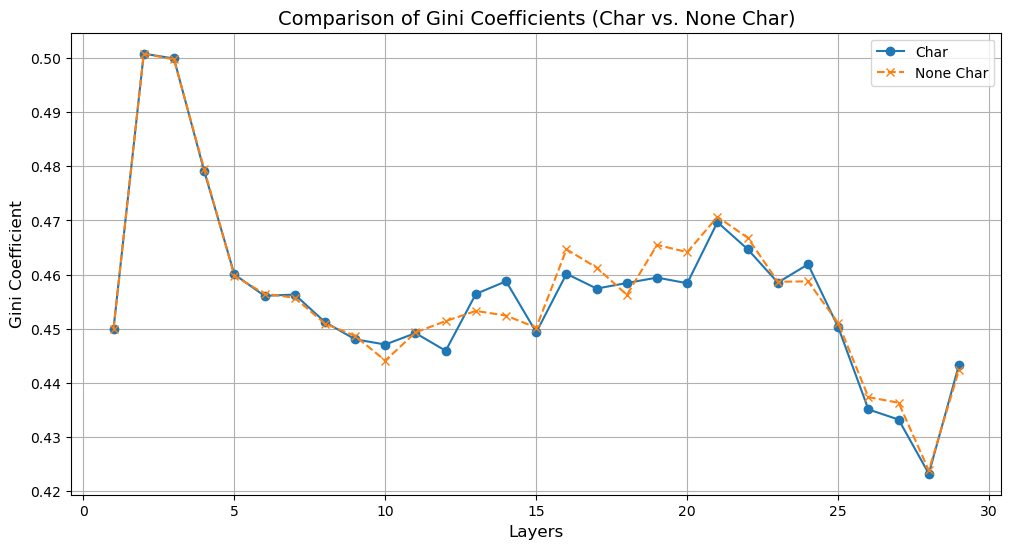

In [294]:
## Gini coefficient

# Function to calculate Gini coefficient for a given data array
def calculate_gini(data):
    """
    Calculate the Gini coefficient for a 1D array of values.
    Args:
        data: 1D NumPy array of activation values.
    Returns:
        Gini coefficient (float).
    """
    data = data.flatten()  # Flatten to a 1D array
    data = np.nan_to_num(data, nan=0.0, posinf=1e6, neginf=-1e6)  # Replace NaN and Inf
    data = np.clip(data, -1e6, 1e6)  # Clip extreme values
    data = np.abs(data)  # Use absolute values for Gini calculation
    data = np.sort(data)  # Sort the array
    n = len(data)  # Number of elements
    
    if n == 0 or np.sum(data) == 0:
        return 0.0  # Return 0 if no data or all values are 0
    
    cumulative_sum = np.cumsum(data)  # Cumulative sum of sorted data
    gini = (1 + (1 / n) - 2 * np.sum(cumulative_sum) / (n * np.sum(data)))
    return gini

# Function to calculate Gini coefficients for all positions and layers
def calculate_gini_per_layer(data):
    """
    Calculate the Gini coefficient for each layer and position.
    Args:
        data: Input tensor of shape (samples, positions, layers, neurons).
    Returns:
        Gini coefficients as a NumPy array of shape (positions, layers).
    """
    num_positions = data.shape[1]
    num_layers = data.shape[2]
    gini_matrix = np.zeros((num_positions, num_layers))
    
    for pos_idx in range(num_positions):  # Iterate over positions
        for layer_idx in range(num_layers):  # Iterate over layers
            layer_data = data[:, pos_idx, layer_idx, :]  # Extract activations for current position and layer
            gini_matrix[pos_idx, layer_idx] = calculate_gini(layer_data)
    
    return gini_matrix

def plot_gini_comparison(gini_char, gini_none_char, title, save_path=None):
    """
    Plot the Gini coefficients for char and none char on the same figure.
    Args:
        gini_char: NumPy array of Gini coefficients for char, shape (positions, layers).
        gini_none_char: NumPy array of Gini coefficients for none char, shape (positions, layers).
        title: Title of the plot.
        save_path: Path to save the plot.
    """
    positions, layers = gini_char.shape
    layers_indices = np.arange(1, layers + 1)  # Layer indices

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot Gini for char
    for pos in range(positions):
        ax.plot(
            layers_indices, gini_char[pos, :], label=f'Char', linestyle='-', marker='o'
        )
    
    # Plot Gini for none char
    for pos in range(positions):
        ax.plot(
            layers_indices, gini_none_char[pos, :], label=f'None Char', linestyle='--', marker='x'
        )
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Layers", fontsize=12)
    ax.set_ylabel("Gini Coefficient", fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Image saved to {save_path}")
    
    plt.show()


# Main workflow: Calculate Gini coefficients
gini_char = calculate_gini_per_layer(data_char_diff)  # Gini for char_diff
gini_none_char = calculate_gini_per_layer(data_none_char_diff)  # Gini for none_char_diff

# Plot comparison
plot_gini_comparison(
    gini_char, 
    gini_none_char, 
    title="Comparison of Gini Coefficients (Char vs. None Char)", 
    save_path=f"{save}/gini_comparison_char_vs_none_char_{task}_{size}.png"
)

Image saved to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/entropy_comparisonall_mean_3B.png


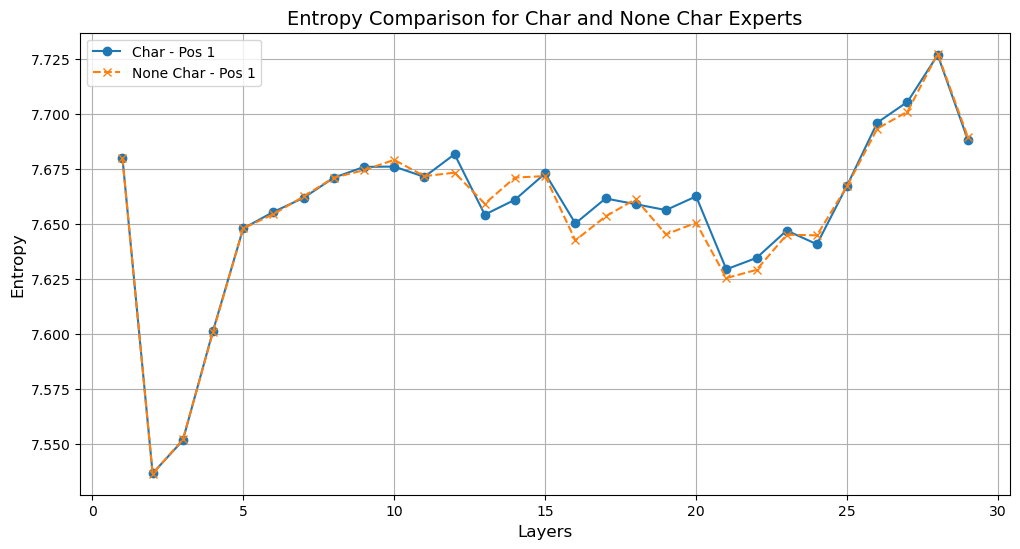

In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Entropy for a given data array
def calculate_entropy(data, eps=1e-10):
    """
    Calculate the entropy for a 1D array of values.
    Args:
        data: 1D NumPy array of activation values.
        eps: Small value to avoid log(0) (default=1e-10).
    Returns:
        Entropy value (float).
    """
    data = data.flatten()  # Flatten to a 1D array
    data = np.nan_to_num(data, nan=0.0, posinf=1e6, neginf=-1e6)  # Replace NaN and Inf
    data = np.clip(np.abs(data), 0, 1e6)  # Clip and take absolute values to avoid extreme values

    if np.sum(data) == 0:
        return 0.0  # Return 0 if all values are 0

    # Normalize to get a probability distribution
    probabilities = data / np.sum(data)  # Ensure sum = 1
    entropy = -np.sum(probabilities * np.log(probabilities + eps))  # Calculate entropy
    return entropy

# Function to calculate Entropy for all positions and layers
def calculate_entropy_per_layer(data):
    """
    Calculate the entropy for each layer and position.
    Args:
        data: Input tensor of shape (samples, positions, layers, neurons).
    Returns:
        Entropy values as a NumPy array of shape (positions, layers).
    """
    num_positions = data.shape[1]
    num_layers = data.shape[2]
    entropy_matrix = np.zeros((num_positions, num_layers))
    
    for pos_idx in range(num_positions):  # Iterate over positions
        for layer_idx in range(num_layers):  # Iterate over layers
            layer_data = data[:, pos_idx, layer_idx, :]  # Extract activations for current position and layer
            entropy_matrix[pos_idx, layer_idx] = calculate_entropy(layer_data)
    
    return entropy_matrix

def plot_entropy_comparison(entropy_char, entropy_none_char, title, save_path=None):
    """
    Plot the Entropy for char and none char on the same figure.
    Args:
        entropy_char: NumPy array of entropy values for char, shape (positions, layers).
        entropy_none_char: NumPy array of entropy values for none char, shape (positions, layers).
        title: Title of the plot.
        save_path: Path to save the plot.
    """
    positions, layers = entropy_char.shape
    layers_indices = np.arange(1, layers + 1)  # Layer indices

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot Entropy for char
    for pos in range(positions):
        ax.plot(
            layers_indices, entropy_char[pos, :], label=f'Char - Pos {pos + 1}', linestyle='-', marker='o'
        )
    
    # Plot Entropy for none char
    for pos in range(positions):
        ax.plot(
            layers_indices, entropy_none_char[pos, :], label=f'None Char - Pos {pos + 1}', linestyle='--', marker='x'
        )
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Layers", fontsize=12)
    ax.set_ylabel("Entropy", fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Image saved to {save_path}")
    
    plt.show()

# Main workflow
entropy_char = calculate_entropy_per_layer(data_char_diff)
entropy_none_char = calculate_entropy_per_layer(data_none_char_diff)

# Main workflow
plot_entropy_comparison(
    entropy_char,
    entropy_none_char,
    title="Entropy Comparison for Char and None Char Experts",
    save_path=f"{save}/entropy_comparison{task}_{size}.png"
)

Saved combined plot to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/combined_char_none_char_all_mean_3B.png


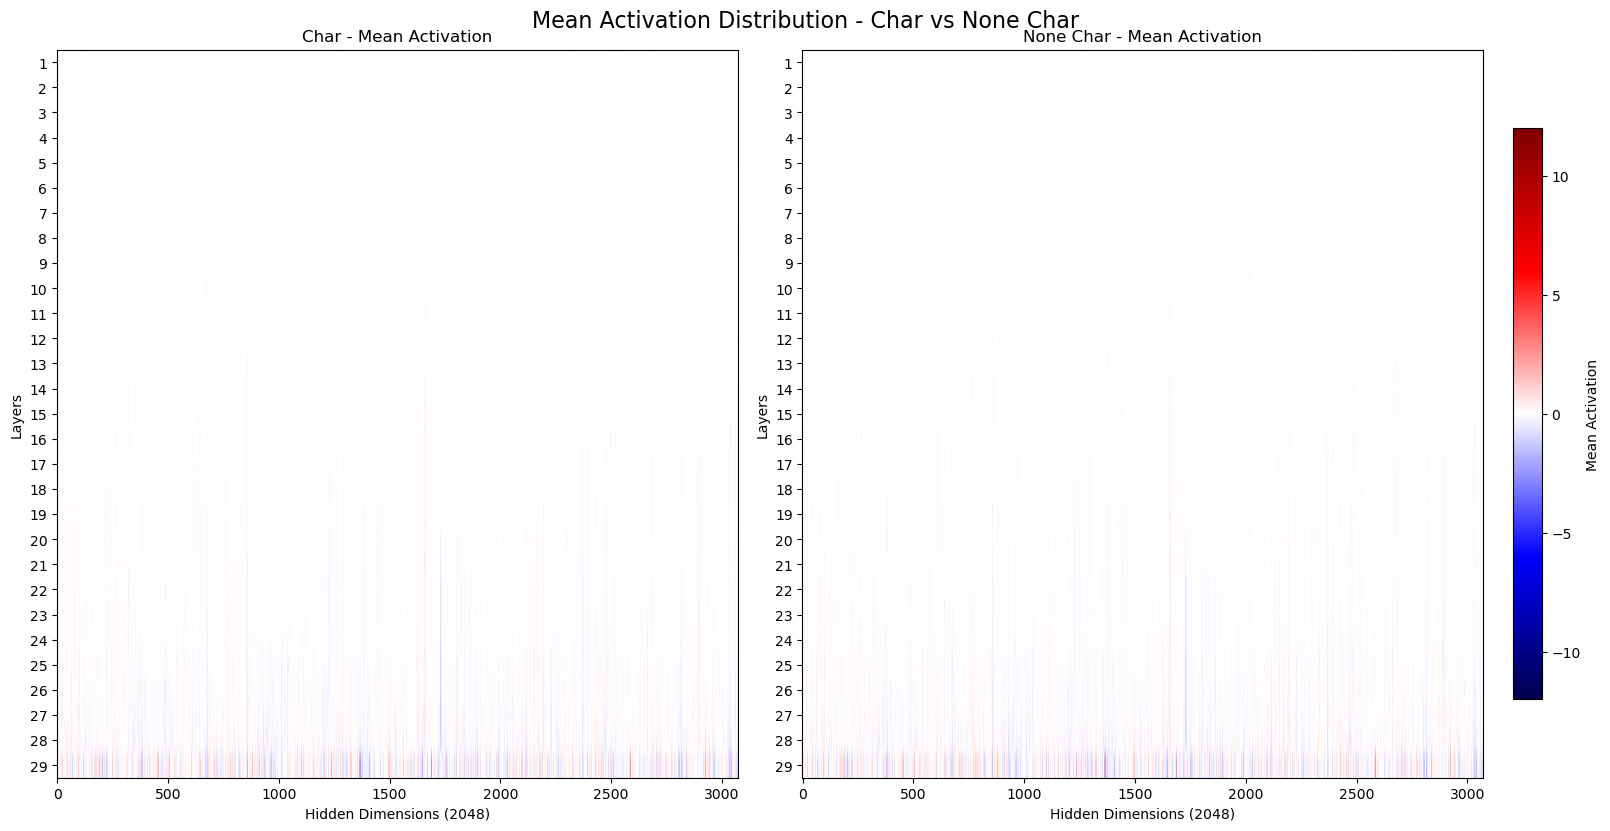

In [298]:
import numpy as np
import matplotlib.pyplot as plt

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences
# normalized_char = normalize_layer_v2(data_char)  # Shape: (103, 6, 17, 2048)
# normalized_none_char = normalize_layer_v2(data_none_char)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char, threshold=0.2)

# Parameters
start = 0
end = num_layers

# Compute mean across samples
mean_char = data_char_diff[:, 0, start:end, :].mean(axis=0)  # Shape: (layers, hidden_size)
mean_none_char = data_none_char_diff[:, 0, start:end, :].mean(axis=0)  # Shape: (layers, hidden_size)

# Normalize range for colorbar
vmin = min(mean_char.min(), mean_none_char.min())
vmax = max(mean_char.max(), mean_none_char.max())
norm_range = max(abs(vmin), abs(vmax))

layer_range = np.arange(start + 1, end + 1)

# Create a single figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Plot Char in the first column
im = axes[0].imshow(mean_char, aspect='auto', cmap='seismic', 
                     vmin=-norm_range, vmax=norm_range)
axes[0].set_title('Char - Mean Activation')
axes[0].set_xlabel('Hidden Dimensions (2048)')
axes[0].set_ylabel('Layers')
axes[0].set_yticks(np.arange(len(layer_range)))
axes[0].set_yticklabels(layer_range)
axes[0].grid(False)

# Plot None Char in the second column
im = axes[1].imshow(mean_none_char, aspect='auto', cmap='seismic', 
                     vmin=-norm_range, vmax=norm_range)
axes[1].set_title('None Char - Mean Activation')
axes[1].set_xlabel('Hidden Dimensions (2048)')
axes[1].set_ylabel('Layers')
axes[1].set_yticks(np.arange(len(layer_range)))
axes[1].set_yticklabels(layer_range)
axes[1].grid(False)

# Add a colorbar for the entire figure
cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('Mean Activation')

# Add a global title
fig.suptitle("Mean Activation Distribution - Char vs None Char", fontsize=16, y=1.02)

# Save the figure
save_path = f"{save}/combined_char_none_char_{task}_{size}.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved combined plot to {save_path}")

plt.show()

Saved Difference plot to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/difference_char_none_char_all_mean_3B.png


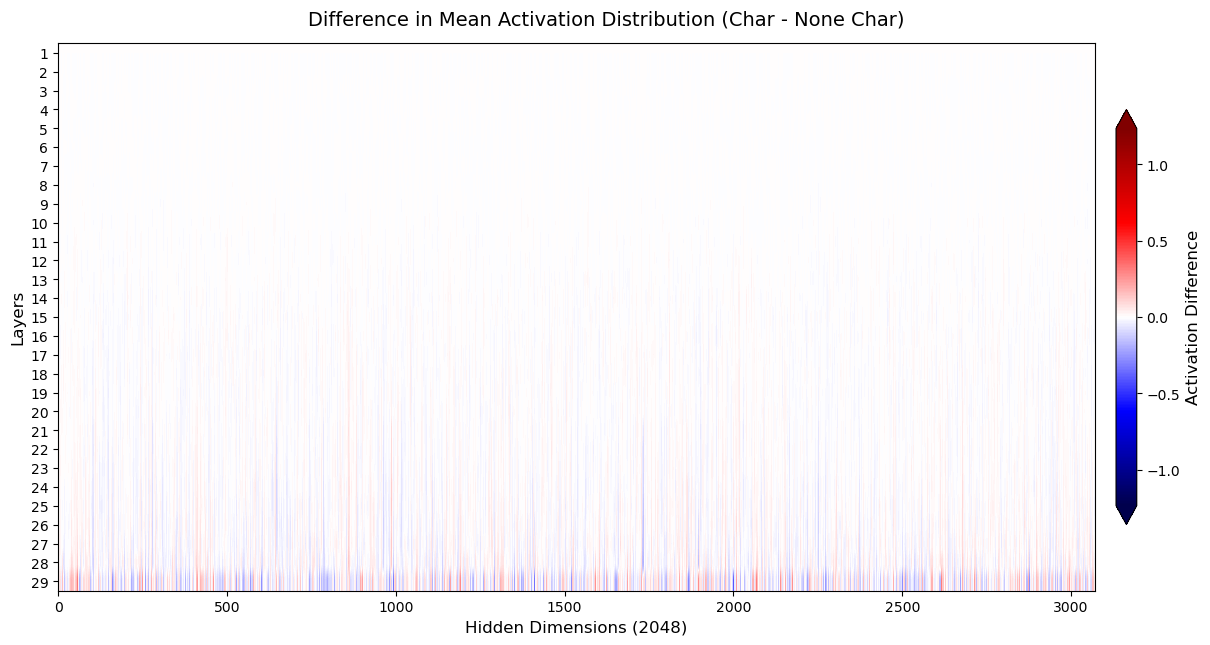

In [300]:
# Plot 2D heat map in each position for differences between management and medical.

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences

mean_diff_samples = char_differences.mean(axis=0)
## modify the bellowing

# Parameters
vmin = mean_diff_samples.min()
vmax = mean_diff_samples.max()
norm_range = max(abs(vmin), abs(vmax))
layer_range = np.arange(start + 1, end + 1)

# Create a figure for the differences
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Plot the heatmap
im = ax.imshow(mean_diff_samples[0], aspect='auto', cmap='seismic', vmin=-norm_range, vmax=norm_range)
ax.set_xlabel("Hidden Dimensions (2048)", fontsize=12)
ax.set_ylabel("Layers", fontsize=12)
ax.set_yticks(np.arange(len(layer_range)))
ax.set_yticklabels(layer_range)
ax.grid(False)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.02, extend='both')
cbar.set_label("Activation Difference", fontsize=12)

# Overall title
fig.suptitle("Difference in Mean Activation Distribution (Char - None Char)", y=1.05, fontsize=14)

# Save the plot
save_path = f"{save}/difference_char_none_char_{task}_{size}.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Saved Difference plot to {save_path}")
plt.show()

Saved Top 0.5% Activation Differences plot to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/llama3/top_0.5_unified_color_char_differences_all_mean_3B.png


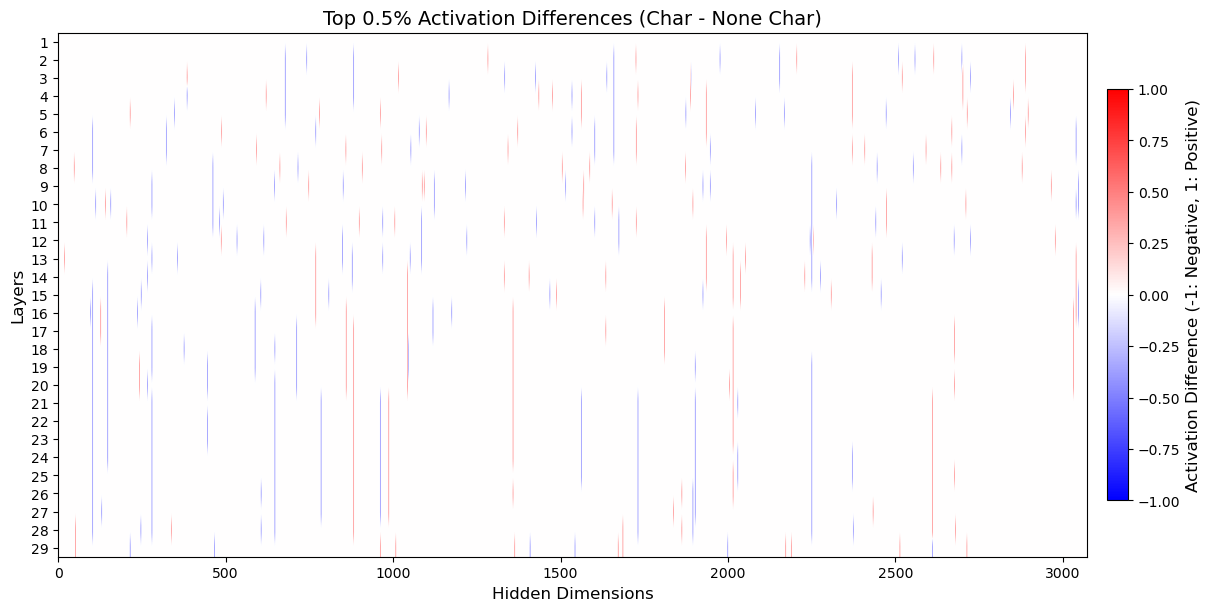

In [302]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
top_percentage = 0.5  # Top x% to display
layer_range = np.arange(start + 1, end + 1)  # Layers
hidden_size = char_differences.shape[-1]  # Hidden dimensions

# Calculate thresholds for each layer based on absolute values
thresholds = np.percentile(np.abs(char_differences), 100 - top_percentage, axis=(0, 1, 3))

# Filter activations based on absolute value thresholds
filtered_char_differences = np.zeros_like(char_differences)  # Initialize with zeros
for layer_idx in range(char_differences.shape[2]):
    layer_threshold = thresholds[layer_idx]
    # Assign 1 to positive values above threshold, -1 to negative values below threshold
    filtered_char_differences[:, :, layer_idx, :][
        char_differences[:, :, layer_idx, :] > layer_threshold
    ] = 1
    filtered_char_differences[:, :, layer_idx, :][
        char_differences[:, :, layer_idx, :] < -layer_threshold
    ] = -1

# Compute mean for filtered differences (values will be -1, 0, or 1)
mean_filtered_diff = filtered_char_differences.mean(axis=0)  # Shape: (1, num_layers, hidden_size)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Plot filtered activations with unified color coding
im = ax.imshow(mean_filtered_diff[0], aspect="auto", cmap="bwr", vmin=-1, vmax=1)  # Use blue-white-red colormap
ax.set_title(f"Top {top_percentage}% Activation Differences (Char - None Char)", fontsize=14)
ax.set_xlabel("Hidden Dimensions", fontsize=12)
ax.set_ylabel("Layers", fontsize=12)
ax.set_yticks(np.arange(len(layer_range)))
ax.set_yticklabels(layer_range)
ax.grid(False)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Activation Difference (-1: Negative, 1: Positive)", fontsize=12)

# Save the plot
save_path = f"{save}/top_{top_percentage}_unified_color_char_differences_{task}_{size}.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Saved Top {top_percentage}% Activation Differences plot to {save_path}")
plt.show()

Saved combined plot to /Users/paveenhuang/Downloads/RoleresultHiddenStates4/plot/qwen2.5/combined_char_none_char_binned_all_mean_7B.png


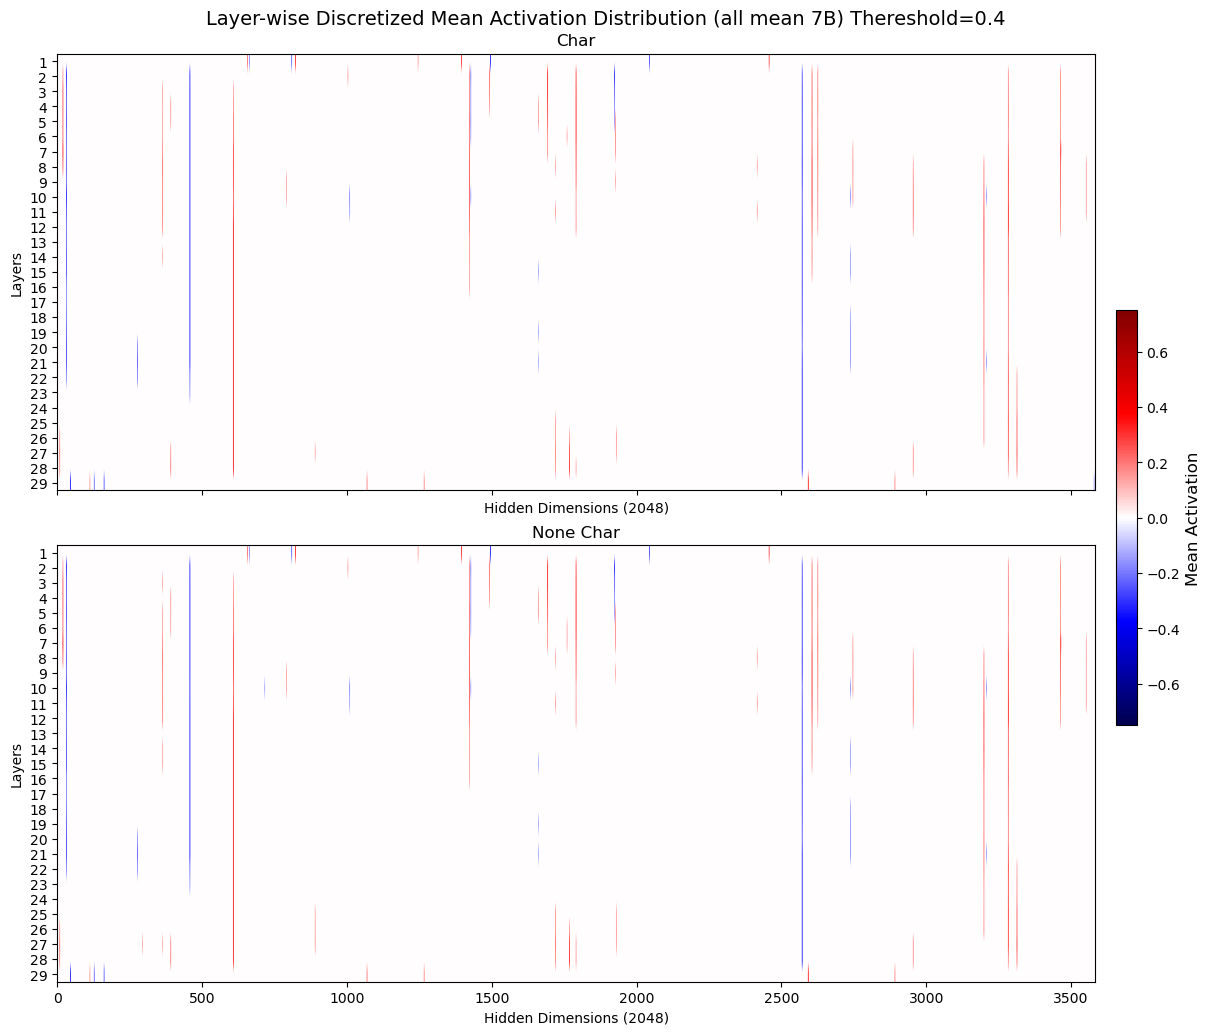

In [225]:
# Normalize with threshold

# data_char
# data_none_char
# data_char_diff
# data_none_char_diff
# char_differences
# normalized_char = normalize_layer_v2(data_char)  # Shape: (103, 6, 17, 2048)
# normalized_none_char = normalize_layer_v2(data_none_char)  # Shape: (103, 6, 17, 2048)
# normalized_bin_char = normalize_layer_with_th(data_char, threshold=0.2)
# normalized_bin_none_char = normalize_layer_with_th(data_none_char, threshold=0.2)

# Normalize with threshold
threshold = 0.4
start = 0
end = num_layers

# Normalize data
normalized_bin_char = normalize_layer_with_th(data_char_diff, threshold=threshold)
normalized_bin_none_char = normalize_layer_with_th(data_none_char_diff, threshold=threshold)

# Compute mean across samples
mean_char_samples = normalized_bin_char[:, :, start:end, :].mean(axis=0).squeeze()  # Shape: (17, 4096)
mean_none_char_samples = normalized_bin_none_char[:, :, start:end, :].mean(axis=0).squeeze()  # Shape: (17, 4096)

# Layer range for y-axis
layer_range = np.arange(start + 1, end + 1)  # Layer index

# Create a combined plot for Char and None Char
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, constrained_layout=True)

# Plot Char (Management)
ax = axes[0]
im = ax.imshow(mean_char_samples, aspect='auto', cmap='seismic', vmin=-0.75, vmax=0.75)
ax.set_title("Char", fontsize=12)
ax.set_xlabel('Hidden Dimensions (2048)', fontsize=10)
ax.set_ylabel('Layers', fontsize=10)
ax.set_yticks(np.arange(len(layer_range)))
ax.set_yticklabels(layer_range)
ax.grid(False)

# Plot None Char (Medical)
ax = axes[1]
im = ax.imshow(mean_none_char_samples, aspect='auto', cmap='seismic', vmin=-0.75, vmax=0.75)
ax.set_title("None Char", fontsize=12)
ax.set_xlabel('Hidden Dimensions (2048)', fontsize=10)
ax.set_ylabel('Layers', fontsize=10)
ax.set_yticks(np.arange(len(layer_range)))
ax.set_yticklabels(layer_range)
ax.grid(False)

# Add a shared colorbar
cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('Mean Activation', fontsize=12)

# Add a global title
fig.suptitle(f"Layer-wise Discretized Mean Activation Distribution ({task_name} {size}) Thereshold={threshold}", fontsize=14, y=1.02)

# Save the plot
save_path = f"{save}/combined_char_none_char_binned_{task}_{size}.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved combined plot to {save_path}")

plt.show()